# Projeto 2 - Investigando os dados de sobreviventes do Titanic

## Introdução


O naufrágio do Titanic é um dos mais trágicos naufrágios da história. Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou depois de colidir com um iceberg, matando 1502 de 2224 passageiros e tripulantes. 

Uma das razões pelas quais o naufrágio causou tal perda de vida foi que não havia botes salva-vidas suficientes para os passageiros e a tripulação.

Esta análise exploratória tem por objetivo analisar os fatores de sobrevivencia para identificar se houveram motivos que favoreceram as chances de sobrevivência dos passageiros.

### Questões a serem analisadas :

- Quantos pessoas sobreviveram e quantas não sobreviveram ?
- O que podemos inferir sobre a idadde dos passageiros ?
    - A idade do passageiro mais velho ?
    - A idade do passageiro mais novo ?
    - A idade média dos passageiros ?
    - As idade dos homem mais velho a não sobreviver e sobreviver ?
    - As idade dos homem mais novo a não sobreviver e sobreviver ?
    - As idade das mulheres mais velha a não sobreviver e sobreviver ?
    - As idade das mulhers mais novas a não sobreviver e sobreviver ?
    - Comparativo entre as idades dos sobreviventes do sexo masculino por classe ?
    - Comparativo entre as idades dos sobreviventes do sexo feminino por classe ?
- O que podemos inferir sobre a sexos dos passageiros e as taxas de sobrevivência ?

In [1]:
# Realizando imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline  

In [2]:
# Carregando dataset
titanic_df = pd.read_csv("titanic-data-6.csv")

### DICIONÁRIO DE DADOS:

Survived (Sobreviveu): 0 = Não 1 = Sim<br/> 
Pclass (Classe): Tipo da passagem 1 = 1º Classe, 2 = 2º Classe 3 = 3º Classe<br/> 
Sex (Sexo): Sexo do passageiro<br/> 
Age (Idade): Idade <br/> 
Sibsp: Quantidade de irmãos / cônjuges a bordo do Titanic<br/> 
Parch: Quantidade de pais / crianças a bordo do Titanic<br/> 
Ticket (Bilhete): Número do bilhete de embarque<br/> 
Fare (Tarifa): Valor da passagem<br/> 
Cabin (Cabine): Número da cabine<br/> 
Embarked (Embarque): Porto de Embarque (C = Cherbourg Q = Queenstown S = Southampton)<br/> 

Informações retiradas do site do  [Kaggle](https://www.kaggle.com/c/titanic/data)

## Análise dos dados

Nesta seção irei análisar os dados contidos no arquivo CSV, afim de verificar se existem dados duplicados ou ausentes que possam interferir para a análise dos questionamentos a serem respondidos por esta análise.

In [3]:
# Visualizando os primeiros elementos do dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Investigando os tipos de dados encontrados no dataset
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Analisando tamanho da matriz de dados

In [5]:
# verificando tamanho dos dados
titanic_df.shape

(891, 12)

Analisando se existem dados duplicados

In [6]:
# verificando por dados duplicados
sum(titanic_df.duplicated())

0

Verificando se existem linhas com valores nullos

In [7]:
# verificando por colunas com dados em brancos ou nulos
titanic_df.columns[titanic_df.isnull().any()].values

array(['Age', 'Cabin', 'Embarked'], dtype=object)

Durante a análise dos dados foi identificado que as colunas age, cabin e Embarked possuem valores nullos. 

## Limpeza de dados

Agora que análisamos os dados, iremos realizar a limpeza do dados. Para esta análise iremos normalizar a coluna 'Age' que representa a idades dos passageiros. Primeiro vamos descobrir a quantidade de linhas com valores nulls para a coluna 'Age'.


In [8]:
e_age = titanic_df['Age'].isnull().sum()
print('Foram encontrados {0} registros sem valor para a coluna Age que representa a idade dos passageiros'.format(e_age))

Foram encontrados 177 registros sem valor para a coluna Age que representa a idade dos passageiros


In [9]:
def normalizeAGE(age):
    """Verifica se a idade informada for menor que 1, se sim, a mesma é sobrescrita para o valor padrão 1, 
        caso seja maior retorna o valor informado.

    Args:
        age (float): idade do passageiro
    """
    if age < 1.0:
        return 1.0
    return age

titanic_df['Age'] = titanic_df['Age'].apply(normalizeAGE)

In [10]:
# Aqui vamos analizar a idade média por sexo e por classe a fim de preencher os dados faltantes de forma mais coerrente.
age_mean_man  = titanic_df[titanic_df['Sex'] == 'male'].groupby('Pclass')['Age'].mean()
age_mean_women  = titanic_df[titanic_df['Sex'] == 'female'].groupby('Pclass')['Age'].mean()

print(age_mean_man)
print(age_mean_women)


# df[df['Sobreviveu'] == 1].groupby('Classe').sum()['Sobreviveu']

Pclass
1    41.282178
2    30.747475
3    26.509881
Name: Age, dtype: float64
Pclass
1    34.611765
2    28.722973
3    21.754902
Name: Age, dtype: float64


In [11]:
titanic_df['Age'].describe()

count    714.000000
mean      29.701681
std       14.521395
min        1.000000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Preenchendo os dados nulos com a idade média dos passageiros por classe

In [12]:
titanic_df['Age']  = titanic_df['Age'].groupby([titanic_df['Sex'], titanic_df['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))

In [13]:
titanic_df['Age'].describe()

count    891.000000
mean      29.114478
std       13.300052
min        1.000000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

Verificando se ainda existem dados nulos para a coluna 'Age'

In [14]:
# Verificando que todos os dados nullos foram preenchidos
titanic_df['Age'].isnull().sum()

0

In [15]:
titanic_df['Age'] = titanic_df['Age'].astype(int)

In [16]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 83.6+ KB


In [17]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.080808,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.309462,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 1 - Pergunta : Quantos pessoas sobreviveram e quantas não sobreviveram

Através da análise podemos concluir que 38.4% sobreviveram e 61.6% não sobreviveram


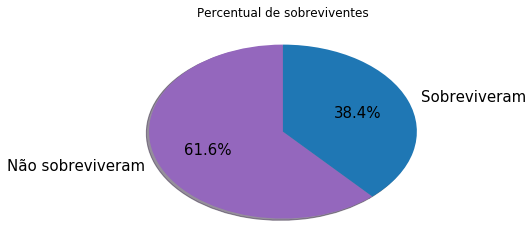

In [18]:
titanic_df['Survived'].value_counts().plot.pie(colors=('tab:purple', 'tab:blue'), 
                                       title='Percentual de sobreviventes', 
                                       fontsize=15, shadow=True, startangle=90, autopct='%1.1f%%', 
                                       labels=('Não sobreviveram','Sobreviveram'),
                                       figsize=(6,4)).set_ylabel('')


data_survival = titanic_df['Survived'].value_counts()
total = data_survival.sum()
not_survival = data_survival[0]
survival = data_survival[1]

def calc_percentual(survival, total):
    return round (((survival * 100) / total), 1)

print('Através da análise podemos concluir que {0}% sobreviveram e {1}% não sobreviveram'
      .format(calc_percentual(survival, total), calc_percentual(not_survival, total)))


## 2 - Pergunta : O que podemos inferir sobre a idadde dos passageiros


In [19]:
print('Vamos olhar um pouco mais de perto os dados contidos na coluna que representa a idade dos passageiros')
titanic_df['Age'].describe()

Vamos olhar um pouco mais de perto os dados contidos na coluna que representa a idade dos passageiros


count    891.000000
mean      29.080808
std       13.309462
min        1.000000
25%       21.000000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

Através da análise acima ja podemos tirar algumas insights. <br>

- O passageiro mais velho tinha a idade de 80 anos
- O passageiro mais novo tinha 1 ano de idade ou menos, visto que aproximamos todas as idades inferiores a 1 para 1.
- A idade média dos passageiros era 29 anos.




No gráfico abaixo é possível visualizar melhor a distribuição de idade dos passageiros


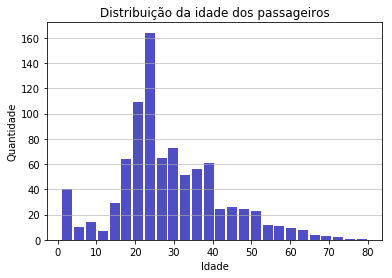

In [20]:
filtered_age = titanic_df[titanic_df['Age'].notnull()]
#filtered_age['Age'].plot(kind='hist')

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=filtered_age['Age'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('Distribuição da idade dos passageiros')
maxfreq = n.max()
print('No gráfico abaixo é possível visualizar melhor a distribuição de idade dos passageiros')

In [21]:
male_surv = titanic_df[(titanic_df.Sex == "male") & (titanic_df.Survived == 1)]
print('O homem mais velho a sobreviver tinha {0} anos e o mais novo tinha {1} ano(s).'
      .format(male_surv['Age'].max(),male_surv['Age'].min()))
male_surv = titanic_df[(titanic_df.Sex == "male") & (titanic_df.Survived == 0)]
print('O homem mais velho a morrer tinha {0} anos e o mais novo tinha {1} ano(s).'
      .format(male_surv['Age'].max(), male_surv['Age'].min()))

O homem mais velho a sobreviver tinha 80 anos e o mais novo tinha 1 ano(s).
O homem mais velho a morrer tinha 74 anos e o mais novo tinha 1 ano(s).


In [22]:
w_surv = titanic_df[(titanic_df.Sex == "female") & (titanic_df.Survived == 1)]
print('A mulher mais velha a sobreviver tinha {0} anos e a mais nova tinha {1} ano(s).'
      .format(w_surv['Age'].max(),w_surv['Age'].min()))
w_surv = titanic_df[(titanic_df.Sex == "female") & (titanic_df.Survived == 0)]
print('A Mulher mais velha a morrer tinha {0} anos e a mais nova tinha {1} ano(s).'
      .format(w_surv['Age'].max(), w_surv['Age'].min()))

A mulher mais velha a sobreviver tinha 63 anos e a mais nova tinha 1 ano(s).
A Mulher mais velha a morrer tinha 57 anos e a mais nova tinha 2 ano(s).


In [23]:
male_surv = titanic_df[(titanic_df.Sex == "male") & (titanic_df.Survived == 1)].groupby('Pclass')
print('A idades dos homemns mais velhos a sobreviver da 1,2 e 3 classe são respectivamente {0} ano(s), {1} ano(s), {2} ano(s).'
      .format(male_surv['Age'].max()[1], male_surv['Age'].max()[2], male_surv['Age'].max()[3]))

A idades dos homemns mais velhos a sobreviver da 1,2 e 3 classe são respectivamente 80 ano(s), 62 ano(s), 45 ano(s).


In [24]:
male_surv = titanic_df[(titanic_df.Sex == "male") & (titanic_df.Survived == 0)].groupby('Pclass')
print('A idades dos homemns mais velhos a não sobreviver da 1,2 e 3 classe são respectivamente {0} ano(s), {1} ano(s), {2} ano(s).'
      .format(male_surv['Age'].max()[1], male_surv['Age'].max()[2], male_surv['Age'].max()[3]))

A idades dos homemns mais velhos a não sobreviver da 1,2 e 3 classe são respectivamente 71 ano(s), 70 ano(s), 74 ano(s).


Text(0,0.5,'')

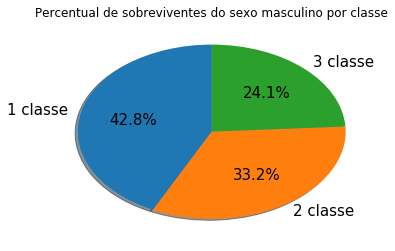

In [25]:
male_surv = titanic_df[(titanic_df.Sex == "male") & (titanic_df.Survived == 1)].groupby('Pclass')
male_surv['Age'].max().plot.pie(title='Percentual de sobreviventes do sexo masculino por classe', 
                                       labels=('1 classe','2 classe', '3 classe'),
                                       fontsize=15, shadow=True, startangle=90, autopct='%1.1f%%', 
                                       figsize=(6,4)).set_ylabel('')

Text(0,0.5,'')

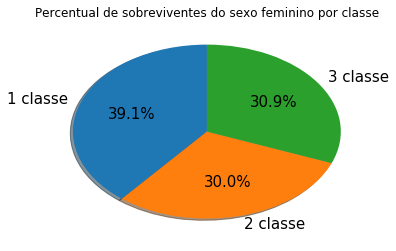

In [26]:
w_surv = titanic_df[(titanic_df.Sex == "female") & (titanic_df.Survived == 1)].groupby('Pclass')
w_surv['Survived'].value_counts().plot.pie(title='Percentual de sobreviventes do sexo feminino por classe', 
                                       labels=('1 classe','2 classe', '3 classe'),
                                       fontsize=15, shadow=True, startangle=90, autopct='%1.1f%%', 
                                       figsize=(6,4)).set_ylabel('')

## 3 - O que podemos inferir sobre a sexos dos passageiros e as taxas de sobrevivência.

Através da análise podemos concluir apenas 109 homens sobreviveram e 468 não sobreviveram


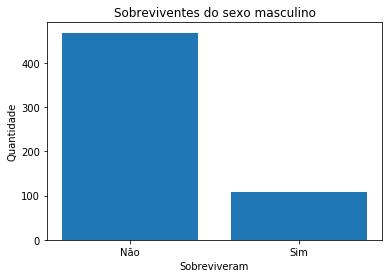

In [27]:
male_survived = titanic_df[titanic_df['Sex'] == "male"]["Survived"]
#print(male_survived.value_counts())

locations = [1, 2]
heights = male_survived.value_counts()
labels = ['Não', 'Sim']
plt.bar(locations, heights, tick_label=labels)
plt.title('Sobreviventes do sexo masculino')
plt.xlabel('Sobreviveram')
plt.ylabel('Quantidade');

print('Através da análise podemos concluir apenas {0} homens sobreviveram e {1} não sobreviveram'
      .format(male_survived.value_counts()[1], male_survived.value_counts()[0]))

In [71]:
print('Passageiros por classe e sexo quesobreviveram')
pvt1_df = titanic_df[titanic_df['Survived'] == 1].pivot_table('PassengerId', ['Sex'], 'Pclass', aggfunc='count')
pvt1_df

Passageiros por classe e sexo quesobreviveram


Pclass,1,2,3
Sex,,,
female,91,70,72
male,45,17,47


In [70]:
print('Passageiros por classe e sexo que não sobreviveram')
pvt2_df = titanic_df[titanic_df['Survived'] == 0].pivot_table('PassengerId', ['Sex'], 'Pclass', aggfunc='count')
pvt2_df

Passageiros por classe e sexo que não sobreviveram


Pclass,1,2,3
Sex,,,
female,3,6,72
male,77,91,300


Através das tabela acima podemos analisar que índice de sobrevivência das mulheres da primeira 
      classe foi altissímo, visto que apenas 3 não sobreviveram. Além disso os homens da terceira classe foram os tiveram o maior índice de mortalidade no acidente.

1    233
0     81
Name: Survived, dtype: int64
Através da análise podemos concluir apenas 233 mulheres sobreviveram e 81 não sobreviveram


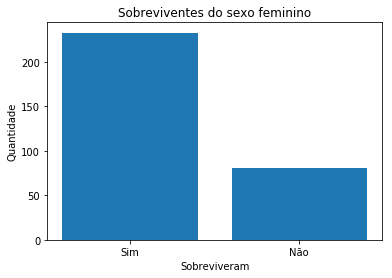

In [28]:
female_survived = titanic_df[titanic_df['Sex'] == "female"]["Survived"]
print(female_survived.value_counts())

locations = [1, 2]
heights = female_survived.value_counts()
labels = ['Sim', 'Não']
plt.bar(locations, heights, tick_label=labels)
plt.title('Sobreviventes do sexo feminino')
plt.xlabel('Sobreviveram')
plt.ylabel('Quantidade');

print('Através da análise podemos concluir apenas {0} mulheres sobreviveram e {1} não sobreviveram'
      .format(female_survived.value_counts()[1], female_survived.value_counts()[0]))

<Figure size 432x288 with 0 Axes>

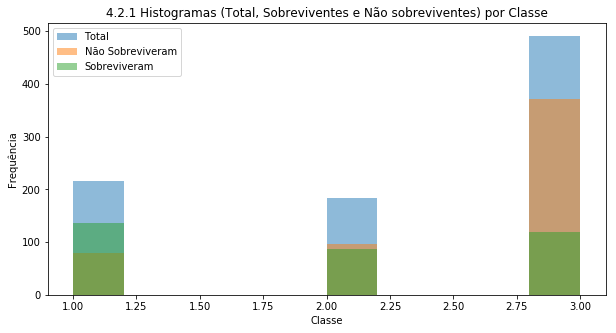

In [104]:
df_histage = pd.DataFrame({'Total': titanic_df['Pclass'],
                           'Não Sobreviveram': titanic_df[titanic_df['Survived'] == 0]['Pclass'], 
                           'Sobreviveram': titanic_df[titanic_df['Survived'] == 1]['Pclass']},                       
                            columns=['Total','Não Sobreviveram', 'Sobreviveram'])

plt.figure();
df_histage.plot.hist(bins=10, alpha=0.5, figsize=(10,5), 
                     title='4.2.1 Histogramas (Total, Sobreviventes e Não sobreviventes) por Classe')
plt.xlabel('Classe')
plt.ylabel('Frequência')
plt.show()

Text(0,0.5,'Quantidade')

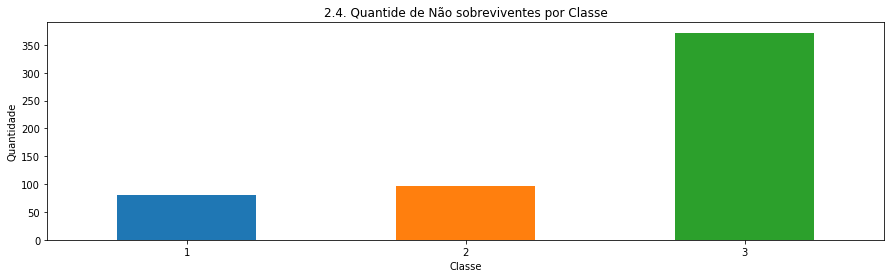

In [105]:
n_surv_class_df = titanic_df[titanic_df['Survived'] == 0].groupby('Pclass')
n_surv_class_df['Survived'].count().plot(kind='bar', title='2.4. Quantide de Não sobreviventes por Classe', 
                                       rot=0, figsize=(15,4)).set_xlabel('Classe')
plt.ylabel('Quantidade')

Text(0,0.5,'Quantidade')

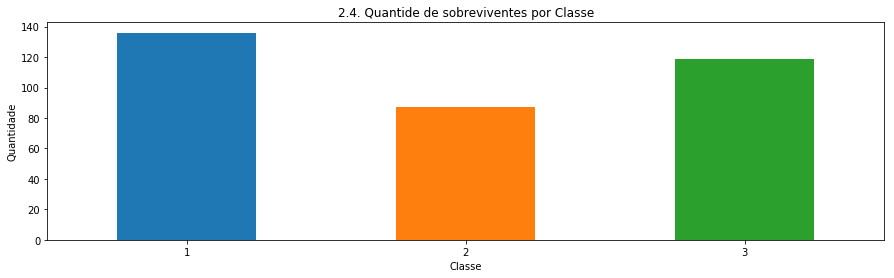

In [42]:
surv_class_df = titanic_df[titanic_df['Survived'] == 1].groupby('Pclass')
surv_class_df['Survived'].count().plot(kind='bar', title='2.4. Quantide de sobreviventes por Classe', 
                                       rot=0, figsize=(15,4)).set_xlabel('Classe')
plt.ylabel('Quantidade')

Text(0,0.5,'Quantidade')

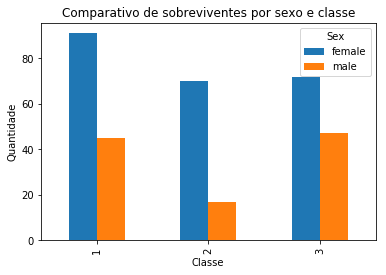

In [93]:
titanic_df[titanic_df['Survived'] == 1].pivot_table('PassengerId', ['Pclass'], 'Sex', aggfunc='count').plot(kind='bar',
                            title='Comparativo de sobreviventes por sexo e classe')
              
plt.xlabel('Classe')
plt.ylabel('Quantidade')

Text(0,0.5,'Quantidade')

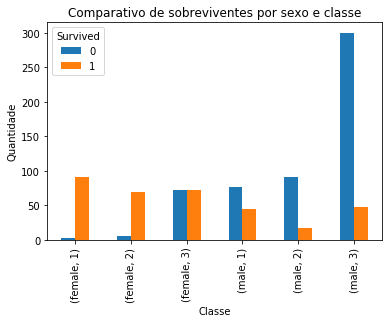

In [106]:
titanic_df.pivot_table('PassengerId', ['Sex', 'Pclass'], 'Survived', aggfunc='count').plot(kind='bar',
                            title='Comparativo de sobreviventes por sexo e classe')
              
plt.xlabel('Classe')
plt.ylabel('Quantidade')

## Conclusão

O objetivo deste trabalho foi realizar uma análise exploratório a fim de identificar se houveram fatores que interferiram na sobrevivências dos passageiros. <br>

Através das análises acima fica claro que o fator sexo e classe foram definitivos para a sobrevivência dos passageiros, visto o alto índice de sobrevivência das mulheres da primeira e segunda classe. Em contra partida os homenos da terceira classe foram os que tiveram o maior índices de mortes, ou seja, com menores possibilidades de sobrevivência.

Através de pesquisas foi descoberto que existiam poucos botes para suprir toda a quantidade de passageiros e também que muitos dos passageiros da terceira classe não conseguiram chegar a nível principal do navio.

## Limitações

Na primeira análise dos dados foi identificado que a massa de dados utilizada possuía colunas com campos vazios, tais como : Age, Cabin e Embarked.

- Medidas realizadas:
    - Age - Foi assinnalado nas linhas com dados faltantes a média da idades por classe e sexo a fim de manter uma proporção mais fiel a realidade.
    - Cabin - Não foi aplicado nenhum tratamento pois esta coluna não foi usada na análise dos dados
    - Embarked - Não foi aplicado nenhum tratamento pois esta coluna não foi usada na análise dos dados

## Insights para novas análises

Existem outras possibilidades de análises e perguntas a serem respondidas tais como :


1. Quantos passageiros havia em cada classe do navio?
2. Quantas mulheres havia a bordo do navio?
3. Quantos homens havia a bordo do navio?
4. Qual a média das idades das mulheres?
5. Qual a média das idades dos homens?
6. Qual a idade da mulher mais idosa?
7. Qual a idade do homem mais idoso?
8. Quantas mulheres havia em cada classe do navio?
9. Quantos homens havia em cada classe do navio?
10. Qual era a porcentagem de homens em cada classe do navio?
11. Qual a média de idade das mulheres em cada classe do navio?
12. Qual a média de idade dos homens em cada classe do navio?
13. Quantos passageiros viajavam acompanhados de membros da família?
14. Quantos passageiros viajavam desacompanhados de membros da família?
15. Quantos passageiros embarcaram em cada porto?
16. Quantos passageiros embarcaram em cada classe em cada porto?
17. Qual o valor médio do tíquete para cada classe?
18. Quantas vezes o tíquete da primeira classe era mais caro que o da segunda?
19. Quantas vezes o tíquete da segunda classe era mais caro que o da terceira?
20. Quantas vezes o tíquete da primeira classe era mais caro que o da terceira?
21. Qual o valor médio do tíquete em cada classe para aqueles que viajavam com membros da família?
22. Qual o valor médio do tíquete em cada classe para aqueles que viajavam desacompanhados da família?
23. Qual o valor médio do tíquete para crianças em cada classe?
24. Qual o valor médio do tíquete para mulheres em cada classe?
25. Qual o valor médio do tíquete para homens em cada classe?
26. Qual o valor médio do tíquete para idosos em cada classe?
27. Qual a idade média dos sobreviventes do naufrágio?
28. Qual a idade média das vítimas do naufrágio?
29. Qual a idade do sobrevivente mais novo?
30. Qual a idade da vítima mais nova?
31. Qual a idade do sobrevivente mais idoso?
32. Qual a idade da vítima mais idosa?
33. Qual a porcentagem de sobreviventes em cada classe do navio?
34. Qual a porcentagem de sobreviventes entre as crianças?
35. Qual a porcentagem de sobreviventes entre as mulheres?
36. Qual a porcentagem de sobreviventes entre os homens?
37. Qual a porcentagem de sobreviventes entre os idosos?
38. Qual a porcentagem de sobreviventes entre os que viajavam com a família?
39. Qual a porcentagem de sobreviventes entre os que viajavam desacompanhados?
40. Qual o valor médio dos tíquetes de sobreviventes em cada classe do navio?
41. Qual o valor médio dos tíquetes das vítimas em cada classe do navio?
42. Quais fatores contribuíram para a sobrevivência dos passageiros a bordo?

Referências :

- http://minerandodados.com.br/index.php/2017/09/01/cafe-com-codigo-tratando-valores-faltantes-pandas-python/
- https://paulovasconcellos.com.br/28-comandos-%C3%BAteis-de-pandas-que-talvez-voc%C3%AA-n%C3%A3o-conhe%C3%A7a-6ab64beefa93
- https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-simples-ao-pandas-1e15eea37fa1
- https://www.vooo.pro/insights/12-tecnicas-pandas-uteis-em-python-para-manipulacao-de-dados/
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html
- https://matplotlib.org/users/pyplot_tutorial.html
- https://realpython.com/python-histograms/
- https://www.dataquest.io/blog/pandas-pivot-table/